# Analyze Neural Net Model

General Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

Local Imports

In [3]:
from model import FullyConnectedNet
from TrainValidTest import TrainValidNeuralNet

In [4]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

## Load Data

In [5]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()
# choose the training and test datasets
train_data = torchvision.datasets.MNIST(root='../data', train=True,
                               download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='../data', train=False,
                              download=True, transform=transform)
# prepare data loaders
train_loader = torch.utils.data.DataLoader( train_data, batch_size=batch_size, 
                            num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                            num_workers=num_workers)

In [6]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

## Batch Details for Loss Computation

Train loader Nro. batches

In [102]:
Batches = len(train_loader)
Batches

2400

In [26]:
len(train_loader.sampler)

48000

Nro_train_samples = Batches * batch_size
Nro_train_samples = 2400

In [25]:
Nro_train_samples = Batches * batch_size
Nro_train_samples

48000

In [36]:
dataiter = iter(train_loader)
batch_data, labels = dataiter.next()

In [37]:
batch_data.size()

torch.Size([20, 1, 28, 28])

In [38]:
batch_data.size(0)

20

In [39]:
len(train_loader.dataset)

60000

In [103]:
Validation_Batches = len(valid_loader)
Validation_Batches

600

## Simple Neural Network as Baseline

### Create Neural Net Model

In [7]:
%reload_ext autoreload
from model import FullyConnectedNet
from TrainValidTest import TrainValidNeuralNet

In [8]:
# initialize the NN
model = FullyConnectedNet()
print(model)

FullyConnectedNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


### Train & Evaluate Neural Network

In [9]:
epoch_train_losses, epoch_eval_losses = [], []
epoch_train_losses, epoch_eval_losses = TrainValidNeuralNet(model, train_loader, valid_loader, 30)

Epoch: 1/30..  Avg. Training Loss: 2.080..  Avg. Validation Loss: 1.124.. 
Epoch: 2/30..  Avg. Training Loss: 0.571..  Avg. Validation Loss: 0.362.. 
Epoch: 3/30..  Avg. Training Loss: 0.295..  Avg. Validation Loss: 0.238.. 
Epoch: 4/30..  Avg. Training Loss: 0.201..  Avg. Validation Loss: 0.180.. 
Epoch: 5/30..  Avg. Training Loss: 0.149..  Avg. Validation Loss: 0.144.. 
Epoch: 6/30..  Avg. Training Loss: 0.119..  Avg. Validation Loss: 0.121.. 
Epoch: 7/30..  Avg. Training Loss: 0.097..  Avg. Validation Loss: 0.115.. 
Epoch: 8/30..  Avg. Training Loss: 0.081..  Avg. Validation Loss: 0.121.. 
Epoch: 9/30..  Avg. Training Loss: 0.068..  Avg. Validation Loss: 0.103.. 
Epoch: 10/30..  Avg. Training Loss: 0.057..  Avg. Validation Loss: 0.099.. 
Epoch: 11/30..  Avg. Training Loss: 0.048..  Avg. Validation Loss: 0.105.. 
Epoch: 12/30..  Avg. Training Loss: 0.042..  Avg. Validation Loss: 0.097.. 
Epoch: 13/30..  Avg. Training Loss: 0.033..  Avg. Validation Loss: 0.103.. 
Epoch: 14/30..  Avg. 

__Save de Model__

In [14]:
torch.save(model.state_dict(), 'model.pt')

### Plot Training and Validation Loss

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

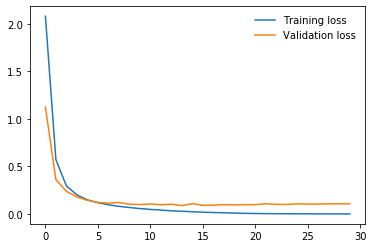

In [11]:
plt.plot(epoch_train_losses, label='Training loss')
plt.plot(epoch_eval_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

## Simple Neural Network with Dropout (MCD)

### Create Neural Network

In [7]:
%reload_ext autoreload
from model import FullyConnectedNetDropOut
from TrainValidTest import TrainValidNeuralNet

In [9]:
# initialize the NN
model_dropout = FullyConnectedNetDropOut()
print(model)

FullyConnectedNetDropOut(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout_02): Dropout(p=0.2, inplace=False)
  (dropout_04): Dropout(p=0.4, inplace=False)
)


### Train & Evaluate Neural Network

In [10]:
epoch_train_losses, epoch_eval_losses = [], []
epoch_train_losses, epoch_eval_losses = TrainValidNeuralNet(model_dropout, train_loader, valid_loader, 30)

Epoch: 1/30..  Avg. Training Loss: 2.115..  Avg. Validation Loss: 1.141.. 
Epoch: 2/30..  Avg. Training Loss: 0.738..  Avg. Validation Loss: 0.394.. 
Epoch: 3/30..  Avg. Training Loss: 0.409..  Avg. Validation Loss: 0.252.. 
Epoch: 4/30..  Avg. Training Loss: 0.283..  Avg. Validation Loss: 0.189.. 
Epoch: 5/30..  Avg. Training Loss: 0.218..  Avg. Validation Loss: 0.152.. 
Epoch: 6/30..  Avg. Training Loss: 0.173..  Avg. Validation Loss: 0.132.. 
Epoch: 7/30..  Avg. Training Loss: 0.146..  Avg. Validation Loss: 0.115.. 
Epoch: 8/30..  Avg. Training Loss: 0.125..  Avg. Validation Loss: 0.107.. 
Epoch: 9/30..  Avg. Training Loss: 0.109..  Avg. Validation Loss: 0.097.. 
Epoch: 10/30..  Avg. Training Loss: 0.097..  Avg. Validation Loss: 0.092.. 
Epoch: 11/30..  Avg. Training Loss: 0.085..  Avg. Validation Loss: 0.083.. 
Epoch: 12/30..  Avg. Training Loss: 0.077..  Avg. Validation Loss: 0.083.. 
Epoch: 13/30..  Avg. Training Loss: 0.069..  Avg. Validation Loss: 0.080.. 
Epoch: 14/30..  Avg. 

__Save the model__

In [11]:
torch.save(model.state_dict(), 'model-dropout.pt')

### Plot Training and Validation Loss

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

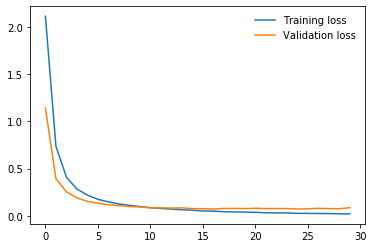

In [13]:
plt.plot(epoch_train_losses, label='Training loss')
plt.plot(epoch_eval_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

## Model Test and Compare

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [22]:
# create iterator
dataiter = iter(test_loader)
# Get batch samples and labels
batch_images, batch_labels = dataiter.next()

batch_images_samples = batch_images.to(device)
batch_labels_samples = batch_labels.to(device)

### Test Model without MCD

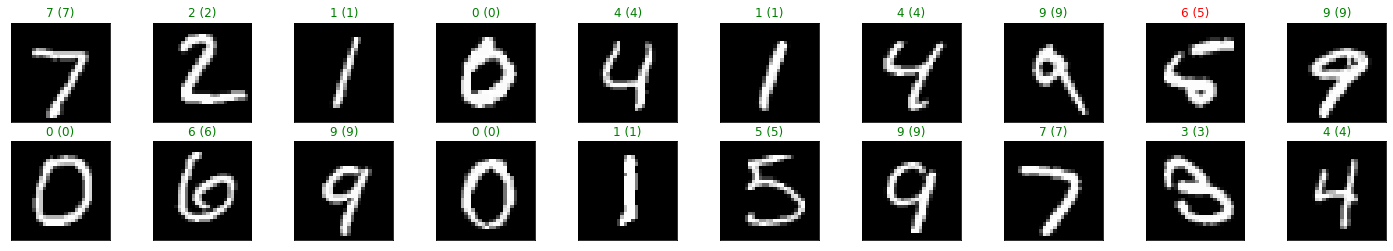

In [25]:
# get sample outputs
output = model_dropout(batch_images_samples)
# convert output probabilities to predicted class,
# get argmax
_, preds = torch.max(output, 1)
# prep images for display
images = batch_images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(batch_labels[idx].item())),
                 color=("green" if preds[idx]==batch_labels[idx] else "red"))

### Test Model with MCD

__Enable dropout during testing__

In [35]:
def apply_dropout(m):
    if type(m) == nn.Dropout:
        m.train()

In [36]:
# Apply dropout on testing 
model_dropout.apply(apply_dropout)

FullyConnectedNetDropOut(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout_02): Dropout(p=0.2, inplace=False)
  (dropout_04): Dropout(p=0.4, inplace=False)
)

__Define the Number of Stochastic Forward passes for each input sample__

In [182]:
# Nro of Forward passes
T = 20
predictions = []

#### Input Sample with Correct Prediction

__Use the same batch__

Use image[0] from batch, which has label "7"

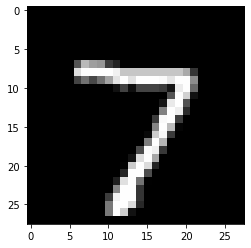

In [38]:
batch_image_sample = batch_images[0].to(device)
batch_label_sample = batch_labels[0].to(device)
# Plot one sample of the batch
img = np.array(batch_image_sample, dtype='float')
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

__Run 20 Stochastic Forward Passes__

In [187]:
predictions = [np.exp(model_dropout(batch_images[0]).detach().numpy()).argmax() for t in range(T)]
predictions

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

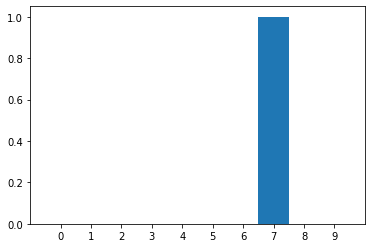

In [192]:
# Plot predictions histogram
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.hist(predictions, range=(0,10), align='left', density=True)
plt.xticks(bins)
plt.show()

In [193]:
counts, bins = np.histogram(predictions, bins=10, range=(0,10), density=True)
counts, bins

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

#### Input Sample with Wrong Prediction

Use the same batch

Use image[8] from batch, which has label "5" but was misclassified as "6"

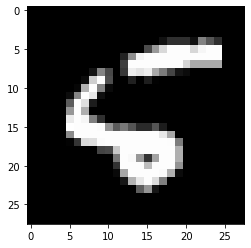

In [238]:
batch_image_sample_8 = batch_images[8].to(device)
batch_label_sample_8 = batch_labels[8].to(device)
# Plot one sample of the batch
img = np.array(batch_image_sample_8, dtype='float')
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

__Run 20 Stochastic Forward Passes__

In [196]:
predictions = [np.exp(model_dropout(batch_images[8]).detach().numpy()).argmax() for t in range(T)]
predictions

[6, 6, 6, 6, 6, 5, 5, 5, 6, 4, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6]

__Plot Predictions Histogram__

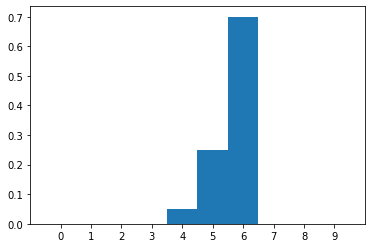

In [197]:
# Plot predictions histogram
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.hist(predictions, range=(0,10), align='left', density=True)
plt.xticks(bins)
plt.show()

The Neural Net gets confused between labels "4" and "6"

#### Input Sample that is Intentionally Out-Of-Distribution (ODD)

__Use the same batch__

Use image[0] from batch, which has label "7" but this time perform the __transpose__ on that image

This operation allows to input an unknown sample to the model (i.e. transposed sample with "7" label).

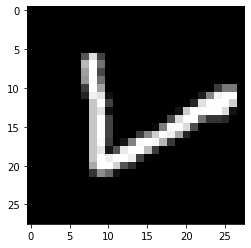

In [285]:
batch_images_samples = batch_images.to(device)
batch_labels_samples = batch_labels.to(device)
# Plot one sample of the batch
#Get sample transpose
batch_image_sample_0_T = batch_image_sample_0.T
# Plot one sample of the batch
img = np.array(batch_image_sample_0_T, dtype='float')
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

__Run 20 Stochastic Forward Passes__

Fix tensor dimensions and turn tensor into contiguous after transpose operation
[Contigious vs non-contigious tensor](https://discuss.pytorch.org/t/contigious-vs-non-contigious-tensor/30107)

In [308]:
#Get sample transpose
imageTransposed = batch_images[0].T.contiguous()
imageTransposed = imageTransposed.to(device)

In [309]:
predictions = [np.exp(model_dropout(imageTransposed).detach().numpy()).argmax() for t in range(T)]
predictions

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

__Plot Predictions Histogram__

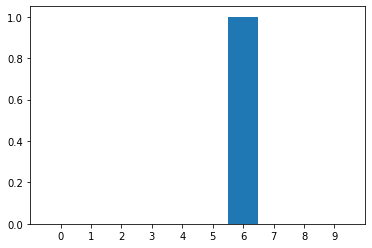

In [310]:
# Plot predictions histogram
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.hist(predictions, range=(0,10), align='left', density=True)
plt.xticks(bins)
plt.show()

The neural networks is totally sure that this input (ODD input) is a "6"

This is very dangerous, the NN is totally confident about something we don't know for sure